## Word2Vec
untuk menciptakan vektor dari kata-kata yang didistribusikan representasi numerik dari fitur-fitur kata yang terdiri dari kata-kata yang mewakili konteks kata-kata individual yang ada dalam kosa kata

Import library yang dibutuhkan

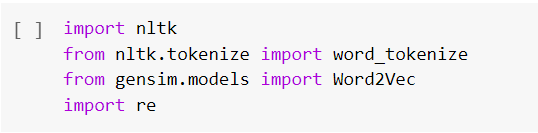

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Import Dataset yang akan digunakan

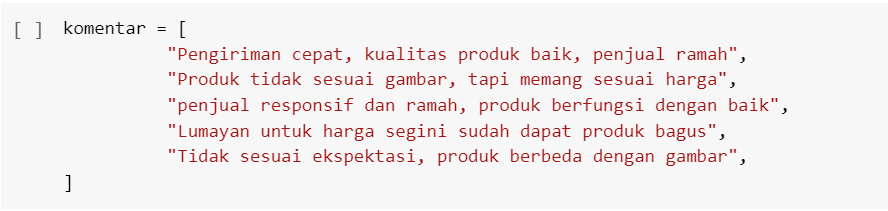

In [6]:
komentar = [
            "Pengiriman cepat, kualitas produk baik, penjual ramah",
            "Produk tidak sesuai gambar, tapi memang sesuai harga", 
            "penjual responsif dan ramah, produk berfugsi dengan baik",
            "Lumayan untuk harga segini sudah dapat produk bagus", 
            "Tidak sesuai ekspetasi, produk berbeda dengan gambar",
]

Menghapus semua tanda baca yang terdapat dalam data seperti (, . )

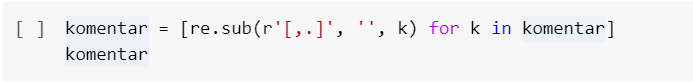

In [7]:
komentar = [re.sub(r'[,.]', '', k)for k in komentar]
komentar

['Pengiriman cepat kualitas produk baik penjual ramah',
 'Produk tidak sesuai gambar tapi memang sesuai harga',
 'penjual responsif dan ramah produk berfugsi dengan baik',
 'Lumayan untuk harga segini sudah dapat produk bagus',
 'Tidak sesuai ekspetasi produk berbeda dengan gambar']

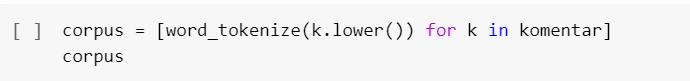

In [9]:
corpus = [word_tokenize(k.lower())for k in komentar]
corpus

[['pengiriman', 'cepat', 'kualitas', 'produk', 'baik', 'penjual', 'ramah'],
 ['produk', 'tidak', 'sesuai', 'gambar', 'tapi', 'memang', 'sesuai', 'harga'],
 ['penjual',
  'responsif',
  'dan',
  'ramah',
  'produk',
  'berfugsi',
  'dengan',
  'baik'],
 ['lumayan', 'untuk', 'harga', 'segini', 'sudah', 'dapat', 'produk', 'bagus'],
 ['tidak', 'sesuai', 'ekspetasi', 'produk', 'berbeda', 'dengan', 'gambar']]

## Train Word2Vec Model

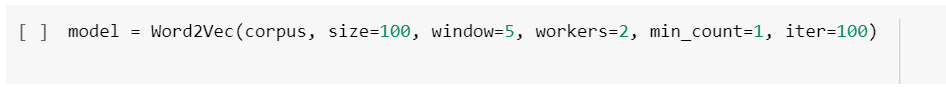

In [10]:
model = Word2Vec(corpus, size=100, window=5, workers=2, min_count=1, iter=100 )

## Menyimpan model

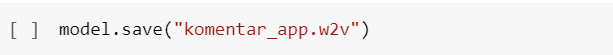

In [11]:
model.save('komentar_app.w2v')

## Load Model
> Menggunakan pretrained model (model yang sudah dibuat sebelumnya)

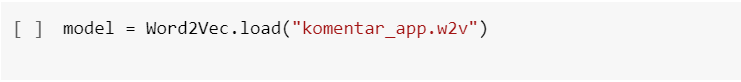

In [12]:
model = Word2Vec.load("komentar_app.w2v")

## Menampilkan Informasi dari Model yang Sudah Dibuat

model.wv adalah Word Vector dari Model yang sudah dibuat

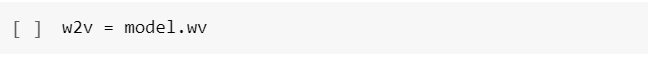

In [13]:
w2v = model.wv

Setelah itu tampilkan semua vocabulary yang sudah di-train

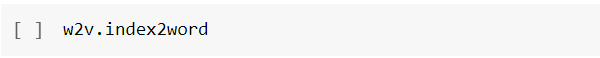

In [15]:
w2v.index2word

['produk',
 'sesuai',
 'baik',
 'penjual',
 'ramah',
 'tidak',
 'gambar',
 'harga',
 'dengan',
 'pengiriman',
 'cepat',
 'kualitas',
 'tapi',
 'memang',
 'responsif',
 'dan',
 'berfugsi',
 'lumayan',
 'untuk',
 'segini',
 'sudah',
 'dapat',
 'bagus',
 'ekspetasi',
 'berbeda']

Menampilkan vector yang sudah dibuat dari dokumen teks

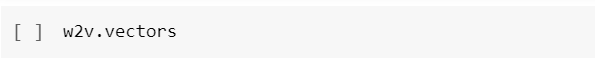

In [16]:
w2v.vectors

array([[ 0.00183625,  0.00481284, -0.0035261 , ...,  0.00199288,
        -0.00445025, -0.00015182],
       [-0.00335809,  0.00039091,  0.00068869, ..., -0.0021256 ,
         0.00406041, -0.00351333],
       [ 0.00509829, -0.00261294,  0.00123815, ...,  0.00183192,
         0.00466213,  0.00439941],
       ...,
       [ 0.00093461,  0.00403758,  0.00318443, ..., -0.00222202,
         0.00410436, -0.00405736],
       [ 0.00358222,  0.0044491 ,  0.00158954, ...,  0.00389893,
        -0.00322238,  0.0004544 ],
       [ 0.00112418,  0.00186857, -0.00333013, ...,  0.00102699,
         0.00310959, -0.00079523]], dtype=float32)

Menampilkan ukuran vektor

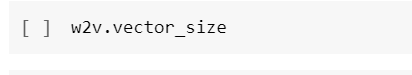

In [17]:
w2v.vector_size

100

Menampilkan vektor kata yang terdapat pada vocabulary

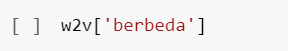

In [18]:
w2v['berbeda']

array([ 1.12417829e-03,  1.86856976e-03, -3.33013432e-03,  4.40577092e-03,
       -4.24394011e-03,  2.25632708e-03, -2.43440364e-03,  1.05952972e-03,
       -4.81781084e-03,  9.35449963e-04,  4.17076098e-03,  2.42242822e-03,
       -1.95549335e-03, -1.11357379e-03, -3.50248505e-04,  2.01119878e-03,
        3.69670754e-03, -6.00947882e-04, -6.39015692e-04,  1.62660168e-03,
       -4.18568030e-03,  3.08707100e-03, -1.80366274e-03,  1.83178775e-03,
       -3.71505134e-03, -4.77180583e-03,  2.56112358e-03,  2.68058456e-03,
        1.53733930e-03,  7.77525769e-04, -4.79269121e-03, -3.11332382e-03,
        1.77842716e-03, -3.14453559e-04, -3.04072397e-03, -1.80405180e-03,
        3.07850540e-03, -3.90471099e-03, -3.56477336e-03,  4.88045206e-03,
       -1.81116117e-03,  3.42482631e-03, -1.19800586e-03, -3.10929609e-04,
        2.62952014e-03,  9.67536937e-04, -1.27388921e-03,  1.02246495e-05,
        2.58624001e-04, -3.15485196e-03,  7.50040228e-04, -4.55399044e-03,
       -4.09821980e-03, -

### Similar Word

Menampilkan kata yang memiliki kemiripan makna dengan kata `produk` atau dalam kata lain yaitu melihat hubungan semantik dari kata `produk` dengan kata lainnya.

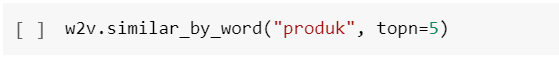

In [19]:
w2v.similar_by_word("produk", topn=5)

[('dapat', 0.35627076029777527),
 ('untuk', 0.17978009581565857),
 ('segini', 0.15408118069171906),
 ('tidak', 0.11058466136455536),
 ('harga', 0.09739255905151367)]

---

## TF-IDF

Menggunakan dataset yang sama seperti pada Word2vec.

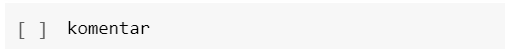

In [20]:
komentar


['Pengiriman cepat kualitas produk baik penjual ramah',
 'Produk tidak sesuai gambar tapi memang sesuai harga',
 'penjual responsif dan ramah produk berfugsi dengan baik',
 'Lumayan untuk harga segini sudah dapat produk bagus',
 'Tidak sesuai ekspetasi produk berbeda dengan gambar']

Import Library yang dibutuhkan

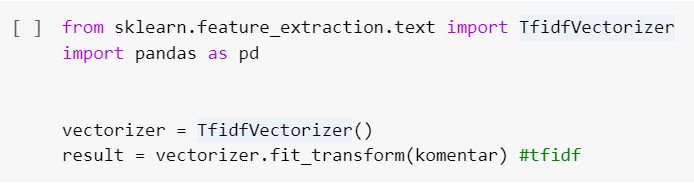

In [21]:
from numpy import vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(komentar)

 Menampilkan nama fitur / token dari dataset

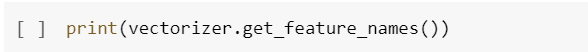

In [22]:
print(vectorizer.get_feature_names())

['bagus', 'baik', 'berbeda', 'berfugsi', 'cepat', 'dan', 'dapat', 'dengan', 'ekspetasi', 'gambar', 'harga', 'kualitas', 'lumayan', 'memang', 'pengiriman', 'penjual', 'produk', 'ramah', 'responsif', 'segini', 'sesuai', 'sudah', 'tapi', 'tidak', 'untuk']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Menampilkan hasil vektor kata

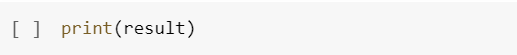

In [23]:
print(result)

  (0, 17)	0.354491454113195
  (0, 15)	0.354491454113195
  (0, 1)	0.354491454113195
  (0, 16)	0.20936836335513379
  (0, 11)	0.4393830201954138
  (0, 4)	0.4393830201954138
  (0, 14)	0.4393830201954138
  (1, 10)	0.3097679976786992
  (1, 13)	0.38394944871221537
  (1, 22)	0.38394944871221537
  (1, 9)	0.3097679976786992
  (1, 20)	0.6195359953573985
  (1, 23)	0.3097679976786992
  (1, 16)	0.18295396952806844
  (2, 7)	0.33411913201775406
  (2, 3)	0.4141320520639498
  (2, 5)	0.4141320520639498
  (2, 18)	0.4141320520639498
  (2, 17)	0.33411913201775406
  (2, 15)	0.33411913201775406
  (2, 1)	0.33411913201775406
  (2, 16)	0.1973361417447812
  (3, 0)	0.3813025879625254
  (3, 6)	0.3813025879625254
  (3, 21)	0.3813025879625254
  (3, 19)	0.3813025879625254
  (3, 24)	0.3813025879625254
  (3, 12)	0.3813025879625254
  (3, 10)	0.30763252709183986
  (3, 16)	0.18169272619885407
  (4, 2)	0.4549817658305219
  (4, 8)	0.4549817658305219
  (4, 7)	0.36707642387391093
  (4, 9)	0.36707642387391093
  (4, 20)	0.367076

**(4, 16)	0.21680124922897376**
Artinya:
> Terdapat kata dengan index ke-16 pada `vectorizer.get_feature_names()` dalam dokumen ke-5 (index dari nol)
>
> dengan bobot TF-IDF 0.21680124922897376

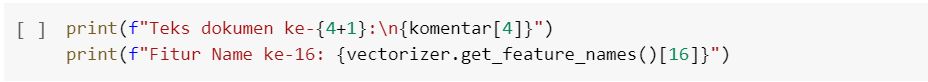

In [24]:
print(f"Teks dokumen ke -{4+1}:\n{komentar[4]}")
print(f"Fitur Name ke-16: {vectorizer.get_feature_names()[16]}")

Teks dokumen ke -5:
Tidak sesuai ekspetasi produk berbeda dengan gambar
Fitur Name ke-16: produk


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


> Dapat diketahui bahwa di dalam dokumen ke-1 (index ke-0) terdapat kata produk

Menampilkan hasil TF-IDF dalam bentuk list dua dimensi

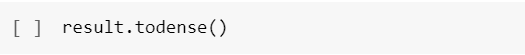

In [25]:
result.todense()

matrix([[0.        , 0.35449145, 0.        , 0.        , 0.43938302,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.43938302, 0.        , 0.        , 0.43938302,
         0.35449145, 0.20936836, 0.35449145, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.309768  ,
         0.309768  , 0.        , 0.        , 0.38394945, 0.        ,
         0.        , 0.18295397, 0.        , 0.        , 0.        ,
         0.619536  , 0.        , 0.38394945, 0.309768  , 0.        ],
        [0.        , 0.33411913, 0.        , 0.41413205, 0.        ,
         0.41413205, 0.        , 0.33411913, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33411913, 0.19733614, 0.33411913, 0.41413205, 0.        ,
         0.        , 0.        ,

Membuat dataframe dari list dua dimensi tersebut. setelah itu Dilakukan transpose agar nama kolom berubah menjadi nama baris dan Nama kolom diubah menjadi urutan dokumen

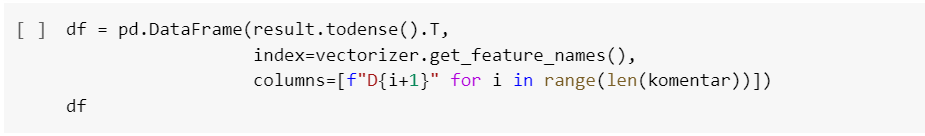

In [26]:
df = pd.DataFrame(result.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f"D{i+1}" for i in range(len(komentar))])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Kata **tidak** memiliki bobot lebih tinggi pada dokumen ke-5 daripada bobot pada dokumen ke-2

## COSINE SIMILARITY



Import library  yang digunakan
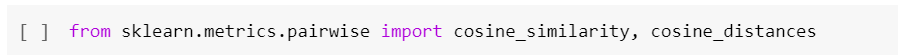

In [ ]:
 
doc1 = 'this is the first document'
doc2 = 'this document is the second document'


Kalimat yang ingin dihitung cosine similaritynya

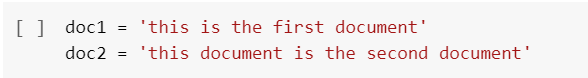

perlu untuk menginputkan vector akan yang digunakan 
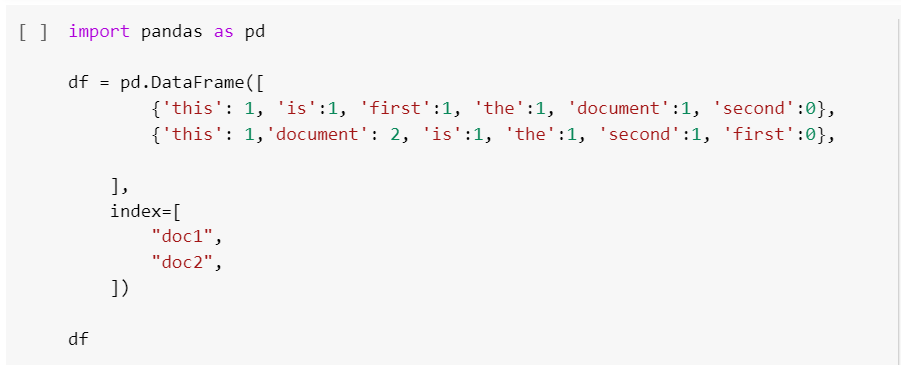

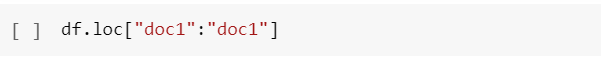

Perhitungan menggunakan Cosine Similarity
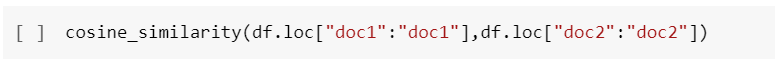

## LATIHAN



1.  Hitung TF_IDF pada contoh kalimat yang digunakan pada cosine similarity 
2.   Hitung cosine similarity pada kalimat berikut: 

*   Pengiriman dan kualitas produk sangat baik
*  Produk tidak sesuai gambar tapi memang sesuai harga
*   tidak sesuai ekspektasi produk berbeda dengan gambar



